# Assignment 2: Data Modelling

Submission for Assignment 2 for student s3701522

<b> 1. Data Import </b>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import linear_model
from sklearn.metrics import  mean_squared_error, r2_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_predict
import xgboost
from sklearn.pipeline import make_pipeline
from math import sqrt
from sklearn.preprocessing import StandardScaler
np.random.seed(0)

In [2]:
# read the data set
x_train = pd.read_csv('X_train.csv', encoding='utf-8', error_bad_lines = False)
y_train = pd.read_csv('y_train.csv', encoding='utf-8')
x_test = pd.read_csv('X_test.csv', encoding='utf-8', error_bad_lines = False)
y_test = pd.read_csv('sampleSubmission.csv')

In [3]:
# check data 
x_train.head()

,id,title,link,series,cover_link,author,author_link,rating_count,review_count,number_of_pages,...,isbn13,asin,settings,characters,awards,amazon_redirect_link,worldcat_redirect_link,recommended_books,books_in_series,description
0,2533958,Frost/Nixon,https://www.goodreads.com//book/show/2533958.F...,NaN,https://i.gr-assets.com/images/S/compressed.ph...,David Frost,https://www.goodreads.com/author/show/264173.D...,523,51,338.0,...,9780230531147,NaN,NaN,"Richard Nixon, David Frost",NaN,https://www.goodreads.com//book_link/follow/17...,https://www.goodreads.com//book_link/follow/8?...,"13167112, 13167112, 29429295, 2074322, 3025937...",NaN,Including hilarious tales of the people he enc...
1,16071790,Just What Kind of Mother Are You?,https://www.goodreads.com//book/show/16071790-...,NaN,https://i.gr-assets.com/images/S/compressed.ph...,Paula Daly,https://www.goodreads.com/author/show/6175529....,10092,1236,320.0,...,9780385680073,NaN,NaN,NaN,NaN,https://www.goodreads.com//book_link/follow/1?...,https://www.goodreads.com//book_link/follow/8?...,"42614702, 42614702, 42182331, 45730306, 379129...",NaN,A searing and sinister thriller for readers wh...
2,13825165,Cafenova,https://www.goodreads.com//book/show/13825165-...,(Clairmont #1),https://i.gr-assets.com/images/S/compressed.ph...,S. Jane Scheyder,https://www.goodreads.com/author/show/5871778....,769,90,318.0,...,9780983031802,NaN,NaN,NaN,NaN,https://www.goodreads.com//book_link/follow/17...,https://www.goodreads.com//book_link/follow/8?...,"89959, 89959, 59091, 1996085, 25843420, 364288...",23498673,"Leaving her broken heart behind in Seattle, Ma..."
3,18061,Uncle Fred in the Springtime,https://www.goodreads.com//book/show/18061.Unc...,(Uncle Fred #1),https://i.gr-assets.com/images/S/compressed.ph...,P.G. Wodehouse,https://www.goodreads.com/author/show/7963.P_G...,4200,328,288.0,...,9781841591308,NaN,NaN,"Clarence Threepwood, Sebastian Beach, Rupert B...",NaN,https://www.goodreads.com//book_link/follow/17...,https://www.goodreads.com//book_link/follow/8?...,"17910171, 17910171, 13418137, 48839090, 390885...","16241184, 16241186, 16241198",Pongo Twistleton is in a state of financial em...
4,3766428,Double Share,https://www.goodreads.com//book/show/3766428-d...,(Golden Age of the Solar Clipper #4),https://i.gr-assets.com/images/S/compressed.ph...,Nathan Lowell,https://www.goodreads.com/author/show/1048167....,4212,184,308.0,...,NaN,NaN,NaN,Ishmael Horatio Wang,Parsec Award Nominee for Best Speculative Fict...,https://www.goodreads.com//book_link/follow/17...,NaN,"53172544, 53172544, 20951387, 52856493, 444219...","2334538, 2906048, 4266110, 6963764, 10054649, ...","In his first assignment as an officer, Ishmael..."


In [4]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41759 entries, 0 to 41758
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      41759 non-null  int64  
 1   title                   41759 non-null  object 
 2   link                    41759 non-null  object 
 3   series                  18647 non-null  object 
 4   cover_link              41273 non-null  object 
 5   author                  41759 non-null  object 
 6   author_link             41759 non-null  object 
 7   rating_count            41759 non-null  int64  
 8   review_count            41759 non-null  int64  
 9   number_of_pages         39886 non-null  float64
 10  date_published          41071 non-null  object 
 11  publisher               38866 non-null  object 
 12  original_title          31463 non-null  object 
 13  genre_and_votes         39521 non-null  object 
 14  isbn                    32284 non-null

<b> 1.1 Data Preparation </b>

Basically, I did the same method in assignment 1 such as uppercase, cleaning extra whitespaces and deal with missing value for both training/test dataset

<b>Uppercase</b>

In [5]:
#Upper case
def upper_case(x):
    for i in x: #create a loop to run through whole data file
        if x[i].dtype == "object": #condition: check if this value is a string or not
            x[i] = x[i].str.upper() #return the uppercase string 
upper_case(x_train)
upper_case(x_test)

<b>Extra whitespaces</b>

In [6]:
#Extra whitespaces
def whitespaces_remover(x):
    for i in x: #create a loop to run through whole data file
        if x[i].dtype == "object": #check if this value is a string or not
            x[i] = x[i].str.strip() #return the same string without whitespaces
            
whitespaces_remover(x_train)
whitespaces_remover(x_test)


<b> Typos mistake </b>

In [7]:
#Checking typos
#Find errors
def check_typos(x):
    for i in x: # Loop through the dataframe
#         if x[i].dtype == "object": # Get object type values
            print(x[i].value_counts()) # Return frequency of object values
check_typos(x_train)
check_typos(x_test)

43626552    1
308540      1
8764765     1
175675      1
10087767    1
           ..
9581107     1
52568625    1
338480      1
7389741     1
2049        1
Name: id, Length: 41759, dtype: int64
BROKEN                            12
LEGACY                            11
TWISTED                           10
SELECTED POEMS                     9
TORN                               9
                                  ..
KINDLE PAPERWHITE USER'S GUIDE     1
THREE MINUTES MORE                 1
HEART OF A WARRIOR ANGEL           1
LOVE AT FIRST BITE                 1
LA CATEDRAL DEL MAR                1
Name: title, Length: 40005, dtype: int64
HTTPS://WWW.GOODREADS.COM//BOOK/SHOW/23359127-SINFUL-DESIRES            1
HTTPS://WWW.GOODREADS.COM//BOOK/SHOW/6850768-HUZUR                      1
HTTPS://WWW.GOODREADS.COM//BOOK/SHOW/28434.JR                           1
HTTPS://WWW.GOODREADS.COM//BOOK/SHOW/911645.A_LIVING_SOUL               1
HTTPS://WWW.GOODREADS.COM//BOOK/SHOW/25152052-THE-JAPANESE-LOVER

After I check the data, I found two mistakes for both training/testing dataset as below

In [8]:
x_test['genre_and_votes'] = x_test['genre_and_votes'].str.replace('American Hi...-','').str.replace(r'[^a-zA-Z0-9, ]', ' ')
x_train['genre_and_votes'] = x_train['genre_and_votes'].str.replace('American Hi...-','').str.replace(r'[^a-zA-Z0-9, ]', ' ')

In [9]:
x_test['genre_and_votes'] = x_test['genre_and_votes'].str.replace('USER','')
x_train['genre_and_votes'] = x_train['genre_and_votes'].str.replace('USER','')

<b>Missing values</b>

In [10]:
x_train['series'] = x_train['series'].apply(lambda x:1 if type(x)==str else 0)
x_train['awards'] = x_train['awards'].apply(lambda x:1 if type(x)==str else 0)

x_test['series'] = x_test['series'].apply(lambda x:1 if type(x)==str else 0)
x_test['awards'] = x_test['awards'].apply(lambda x:1 if type(x)==str else 0)

In [11]:
#Missing value
x_train['series'] = x_train['series'].fillna("UNKNOWN")
x_train['cover_link'] = x_train['cover_link'].fillna("UNKNOWN")
x_train['date_published'] = x_train['date_published'].fillna("UNKNOWN")
x_train['publisher'] = x_train['publisher'].fillna("UNKNOWN")
x_train['original_title'] = x_train['original_title'].fillna("UNKNOWN")
x_train['genre_and_votes'] = x_train['genre_and_votes'].fillna("UNKNOWN")
x_train['isbn'] = x_train['isbn'].fillna("UNKNOWN")
x_train['isbn13'] = x_train['isbn13'].fillna("UNKNOWN")
x_train['asin'] = x_train['asin'].fillna("UNKNOWN")
x_train['settings'] = x_train['settings'].fillna("UNKNOWN")
x_train['characters'] = x_train['characters'].fillna("UNKNOWN")
x_train['awards'] = x_train['awards'].fillna("UNKNOWN")
x_train['worldcat_redirect_link'] = x_train['worldcat_redirect_link'].fillna("UNKNOWN")
x_train['recommended_books'] = x_train['recommended_books'].fillna("UNKNOWN")
x_train['books_in_series'] = x_train['books_in_series'].fillna("UNKNOWN")
x_train['description'] = x_train['description'].fillna("UNKNOWN")

In [12]:
x_train['number_of_pages'] = x_train['number_of_pages'].fillna(x_train['number_of_pages'].mean())
x_train['rating_count'] = x_train['rating_count'].fillna(x_train['rating_count'].mean())
x_train['review_count'] = x_train['review_count'].fillna(x_train['review_count'].mean())

In [13]:
x_test['series'] = x_test['series'].fillna("UNKNOWN")
x_test['cover_link'] = x_test['cover_link'].fillna("UNKNOWN")
x_test['date_published'] = x_test['date_published'].fillna("UNKNOWN")
x_test['publisher'] = x_test['publisher'].fillna("UNKNOWN")
x_test['original_title'] = x_test['original_title'].fillna("UNKNOWN")
x_test['genre_and_votes'] = x_test['genre_and_votes'].fillna("UNKNOWN")
x_test['isbn'] = x_test['isbn'].fillna("UNKNOWN")
x_test['isbn13'] = x_test['isbn13'].fillna("UNKNOWN")
x_test['asin'] = x_test['asin'].fillna("UNKNOWN")
x_test['settings'] = x_test['settings'].fillna("UNKNOWN")
x_test['characters'] = x_test['characters'].fillna("UNKNOWN")
x_test['worldcat_redirect_link'] = x_test['worldcat_redirect_link'].fillna("UNKNOWN")
x_test['recommended_books'] = x_test['recommended_books'].fillna("UNKNOWN")
x_test['books_in_series'] = x_test['books_in_series'].fillna("UNKNOWN")
x_test['description'] = x_test['description'].fillna("UNKNOWN")
x_test['awards'] = x_test['awards'].fillna("UNKNOWN")

In [14]:
x_test['number_of_pages'] = x_test['number_of_pages'].fillna(x_test['number_of_pages'].mean())
x_test['rating_count'] = x_test['rating_count'].fillna(x_test['rating_count'].mean())
x_test['review_count'] = x_test['review_count'].fillna(x_test['review_count'].mean())

<b> 1.2 Data Exploration </b>

In [15]:
x_train.head()

,id,title,link,series,cover_link,author,author_link,rating_count,review_count,number_of_pages,...,isbn13,asin,settings,characters,awards,amazon_redirect_link,worldcat_redirect_link,recommended_books,books_in_series,description
0,2533958,FROST/NIXON,HTTPS://WWW.GOODREADS.COM//BOOK/SHOW/2533958.F...,0,HTTPS://I.GR-ASSETS.COM/IMAGES/S/COMPRESSED.PH...,DAVID FROST,HTTPS://WWW.GOODREADS.COM/AUTHOR/SHOW/264173.D...,523,51,338.0,...,9780230531147,UNKNOWN,UNKNOWN,"RICHARD NIXON, DAVID FROST",0,HTTPS://WWW.GOODREADS.COM//BOOK_LINK/FOLLOW/17...,HTTPS://WWW.GOODREADS.COM//BOOK_LINK/FOLLOW/8?...,"13167112, 13167112, 29429295, 2074322, 3025937...",UNKNOWN,INCLUDING HILARIOUS TALES OF THE PEOPLE HE ENC...
1,16071790,JUST WHAT KIND OF MOTHER ARE YOU?,HTTPS://WWW.GOODREADS.COM//BOOK/SHOW/16071790-...,0,HTTPS://I.GR-ASSETS.COM/IMAGES/S/COMPRESSED.PH...,PAULA DALY,HTTPS://WWW.GOODREADS.COM/AUTHOR/SHOW/6175529....,10092,1236,320.0,...,9780385680073,UNKNOWN,UNKNOWN,UNKNOWN,0,HTTPS://WWW.GOODREADS.COM//BOOK_LINK/FOLLOW/1?...,HTTPS://WWW.GOODREADS.COM//BOOK_LINK/FOLLOW/8?...,"42614702, 42614702, 42182331, 45730306, 379129...",UNKNOWN,A SEARING AND SINISTER THRILLER FOR READERS WH...
2,13825165,CAFENOVA,HTTPS://WWW.GOODREADS.COM//BOOK/SHOW/13825165-...,1,HTTPS://I.GR-ASSETS.COM/IMAGES/S/COMPRESSED.PH...,S. JANE SCHEYDER,HTTPS://WWW.GOODREADS.COM/AUTHOR/SHOW/5871778....,769,90,318.0,...,9780983031802,UNKNOWN,UNKNOWN,UNKNOWN,0,HTTPS://WWW.GOODREADS.COM//BOOK_LINK/FOLLOW/17...,HTTPS://WWW.GOODREADS.COM//BOOK_LINK/FOLLOW/8?...,"89959, 89959, 59091, 1996085, 25843420, 364288...",23498673,"LEAVING HER BROKEN HEART BEHIND IN SEATTLE, MA..."
3,18061,UNCLE FRED IN THE SPRINGTIME,HTTPS://WWW.GOODREADS.COM//BOOK/SHOW/18061.UNC...,1,HTTPS://I.GR-ASSETS.COM/IMAGES/S/COMPRESSED.PH...,P.G. WODEHOUSE,HTTPS://WWW.GOODREADS.COM/AUTHOR/SHOW/7963.P_G...,4200,328,288.0,...,9781841591308,UNKNOWN,UNKNOWN,"CLARENCE THREEPWOOD, SEBASTIAN BEACH, RUPERT B...",0,HTTPS://WWW.GOODREADS.COM//BOOK_LINK/FOLLOW/17...,HTTPS://WWW.GOODREADS.COM//BOOK_LINK/FOLLOW/8?...,"17910171, 17910171, 13418137, 48839090, 390885...","16241184, 16241186, 16241198",PONGO TWISTLETON IS IN A STATE OF FINANCIAL EM...
4,3766428,DOUBLE SHARE,HTTPS://WWW.GOODREADS.COM//BOOK/SHOW/3766428-D...,1,HTTPS://I.GR-ASSETS.COM/IMAGES/S/COMPRESSED.PH...,NATHAN LOWELL,HTTPS://WWW.GOODREADS.COM/AUTHOR/SHOW/1048167....,4212,184,308.0,...,UNKNOWN,UNKNOWN,UNKNOWN,ISHMAEL HORATIO WANG,1,HTTPS://WWW.GOODREADS.COM//BOOK_LINK/FOLLOW/17...,UNKNOWN,"53172544, 53172544, 20951387, 52856493, 444219...","2334538, 2906048, 4266110, 6963764, 10054649, ...","IN HIS FIRST ASSIGNMENT AS AN OFFICER, ISHMAEL..."


<b> Visualization 1 </b>

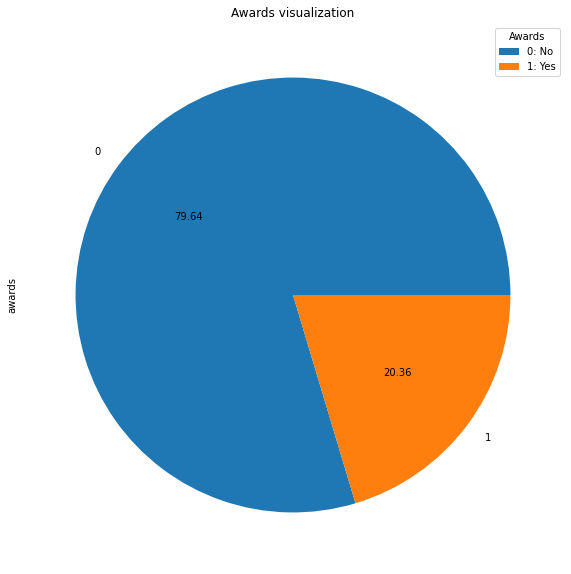

In [16]:
x_train['awards'].value_counts().plot(kind="pie", autopct ='%.2f', figsize = (15, 10))
#Define the title and set legend
plt.title("Awards visualization")
plt.legend(["0: No", "1: Yes"], title ="Awards",loc = "best", bbox_to_anchor = (1, 1) )

I use pie chart to illustrate award viewing for a variety of reasons. First of all, for showing data like that, the pie chart is very good. Secondly, to show percentage or portional data, the pie chart is used. Finally, as there are only two forms of interaction with the award data, it is simple to construct a pie chart and the user can easily see if the books have won an award. As can be seen, only 20% of books had been won a award. 

<b> Visualization 2 </b>

<AxesSubplot:xlabel='review_count'>

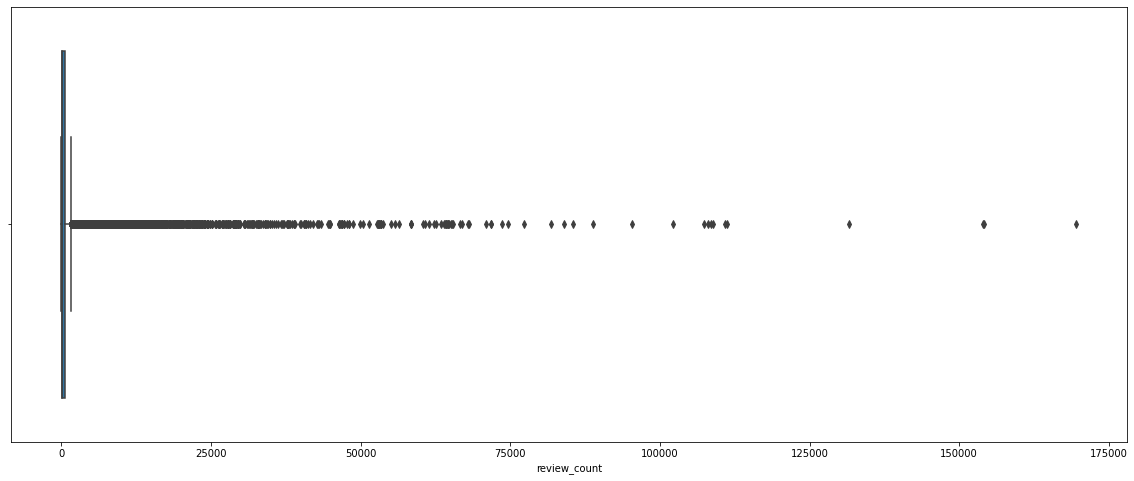

In [17]:
# check outliner
plt.figure(figsize=(20,8))
sns.boxplot(x = x_train['review_count'])

According to the graph, books has more than 25000 reviews is considered the outlier.

In [18]:
# drop outlier
x_train_subset = x_train.drop(x_train.index[x_train['review_count']>25000])

Text(0, 0.5, 'Frequency')

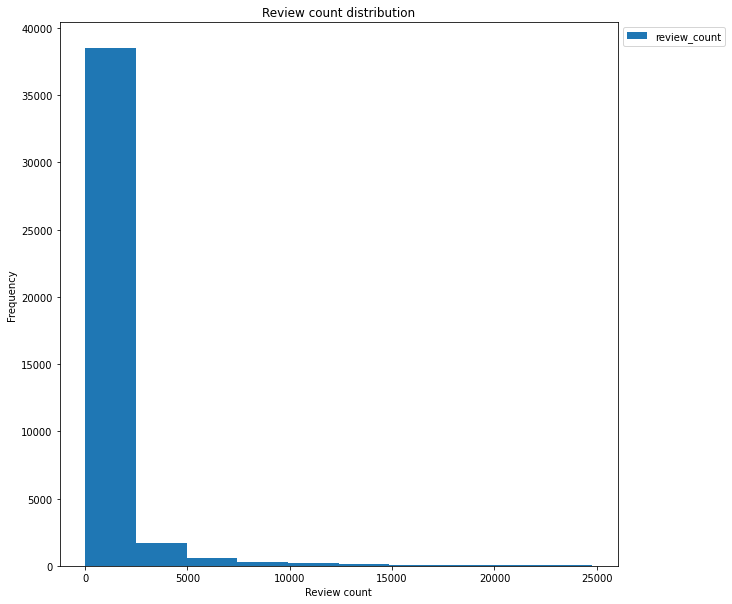

In [19]:
figure = plt.figure(figsize=(10,10)) 
#Define the axis
ax = figure.gca()
#Draw the plot using histogram plot
x_train_subset['review_count'].plot.hist(ax = ax)
#Define the title, x label, y label
plt.legend(loc = "upper left", bbox_to_anchor = (1, 1) )
ax.set_title('Review count distribution')
ax.set_xlabel('Review count') 
ax.set_ylabel('Frequency')


Through this chart we can see that the majority of books have zero reviews. A few books with reviews fall in the range of 0 to 5000. Very few books have reviews above 5000.

<b> Visualization 3 </b>

Text(0, 0.5, 'review_count')

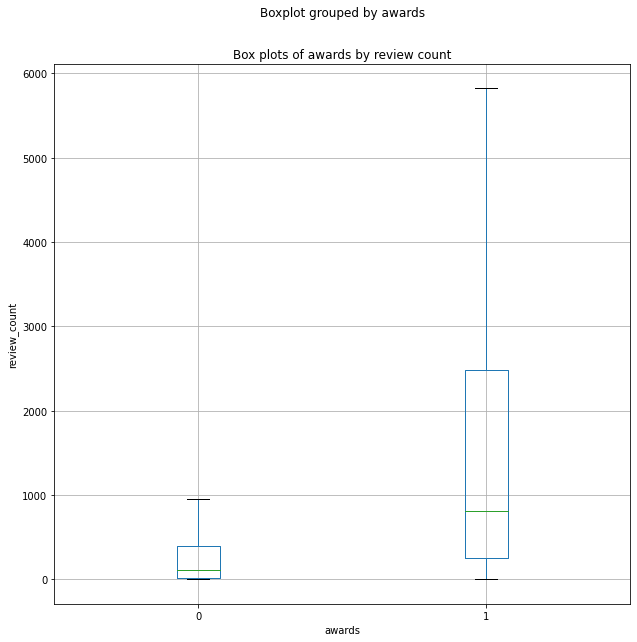

In [20]:
#set the plot area
figure = plt.figure(figsize=(10,10)) 
# Define axis 
ax = figure.gca()    
x_train[['review_count','awards']].boxplot(by = 'awards', ax = ax, showfliers=False) 
#Define title, x lable and y lable
# plt.legend(loc = "upper left", bbox_to_anchor = (1, 1) )
ax.set_title('Box plots of awards by review count') 
ax.set_xlabel('awards')
ax.set_ylabel('review_count')

The box plots graphic below illustrates the different distribution level of book review according to 2 groups of books. These books are divided into 2 groups as ‘Rewarded’ (shown as 1) for books which have achieved at least 1 reward and ‘Not Rewarded’ (shown as 0) for books which have never been rewarded by the community. According to the chart, it can be seen that there is no ‘Not Rewarded’ book comes across the quantity of 1000 reviews. For this group, these books only can receive from 0 to nearly 1000 reviews. However, most of them receive from 0 to about 400 review. The mean value for book review of this group is only about 100 review per book. On the other hand, the group ‘Rewarded’ books has wider distribution of review (from 0 to 5800). The distribution level become thick from 300 to 2500. The mean value stays at 800, which is 8 times compared to the ‘Not Rewarded’ group.


<b> 2. Feature Engineering </b>

In [21]:
x_train.insert(0, 'average_rating' ,y_train['average_rating'])
x_test.insert(0, 'average_rating' ,y_train['average_rating'])

<b> Drop unnecessary columns </b>


In [22]:
x_train = x_train.drop(columns={'books_in_series','date_published','original_title','settings','id', 'link', 'cover_link', 'author_link', 'amazon_redirect_link', 'worldcat_redirect_link', 'asin', 'isbn', 'isbn13', 'description', 'recommended_books','description'}, axis =1)

In [23]:
x_test = x_test.drop(columns={'books_in_series','date_published','original_title','settings','id', 'link', 'cover_link', 'author_link', 'amazon_redirect_link', 'worldcat_redirect_link', 'asin', 'isbn', 'isbn13', 'description', 'recommended_books','description'}, axis =1)

<b> Label encoding </b>


In [24]:
label_encode = preprocessing.LabelEncoder()
list = ["title","author", "publisher","genre_and_votes","awards","series","average_rating",'characters']
for i in list:
    x_train[i] = label_encode.fit_transform(x_train[i])
    x_test[i] = label_encode.fit_transform(x_test[i])

In [25]:
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = x_train.corr()
corr.style.background_gradient(cmap='coolwarm')

,average_rating,title,series,author,rating_count,review_count,number_of_pages,publisher,genre_and_votes,characters,awards
average_rating,1.000000,-0.008395,0.080111,-0.001605,0.020408,0.009589,0.109233,0.010725,0.046391,0.048555,-0.053647
title,-0.008395,1.000000,-0.040948,0.074566,-0.002042,0.001797,0.013286,0.086465,-0.013641,0.033299,-0.003987
series,0.080111,-0.040948,1.000000,-0.021844,0.021161,0.017385,0.089251,-0.034129,-0.023654,-0.208709,-0.020086
author,-0.001605,0.074566,-0.021844,1.000000,-0.006928,-0.006758,0.004805,0.089651,0.013548,0.023717,0.004330
rating_count,0.020408,-0.002042,0.021161,-0.006928,1.000000,0.831690,0.031937,-0.012592,-0.041086,-0.139600,0.152328
review_count,0.009589,0.001797,0.017385,-0.006758,0.831690,1.000000,0.042019,-0.023071,-0.022092,-0.192312,0.256107
number_of_pages,0.109233,0.013286,0.089251,0.004805,0.031937,0.042019,1.000000,-0.005973,-0.054763,-0.054674,0.051035
publisher,0.010725,0.086465,-0.034129,0.089651,-0.012592,-0.023071,-0.005973,1.000000,0.020413,0.066653,-0.049446
genre_and_votes,0.046391,-0.013641,-0.023654,0.013548,-0.041086,-0.022092,-0.054763,0.020413,1.000000,0.008200,-0.043241
characters,0.048555,0.033299,-0.208709,0.023717,-0.139600,-0.192312,-0.054674,0.066653,0.008200,1.000000,-0.154531


<b> Feature selection </b>

<b> For X_Train </b>

In [26]:
# separate label column
X = x_train.copy()
del(X['average_rating'])
X = np.array(X)
Y = np.array(x_train['average_rating'])

In [27]:
# Recursive Feature Elimination - feature selection
from sklearn.feature_selection import RFE
model = linear_model.LinearRegression()
rfe = RFE(model, n_features_to_select=3)
fit = rfe.fit(X, Y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 3
Selected Features: [False  True False False False  True False False False  True]
Feature Ranking: [6 1 7 8 3 1 5 4 2 1]


In [28]:
# 80 train, 20 value
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=0, shuffle=True)
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)
my_prediction = lin_reg.predict(X_test)
predict_df = pd.DataFrame({'Actual value': Y_test.tolist(), 'Predicted value': my_prediction.tolist()}).head(25)
predict_df.head(10)

,Actual value,Predicted value
0,174,158.394377
1,218,156.790782
2,134,155.163297
3,255,160.504493
4,134,157.503068
5,100,158.168399
6,152,161.703474
7,176,164.009250
8,170,161.388801
9,133,164.901669


In [29]:
metrics.mean_absolute_error(Y_test, my_prediction)

25.34171658630055

In [30]:
metrics.mean_squared_error(Y_test, my_prediction)

1144.5340323412163

In [31]:
np.sqrt(metrics.mean_squared_error(Y_test, my_prediction))

33.830962628060355

<b> By KFold </b>

In [32]:
cv = KFold(n_splits=5, random_state=0, shuffle=True)
classifier_pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=10))
Y_pred = cross_val_predict(classifier_pipeline, X, Y, cv=cv)
print("RMSE: " + str(round(sqrt(mean_squared_error(Y,Y_pred)),2)))
print("R2: " + str(round(r2_score(Y,Y_pred),2)))

RMSE: 33.37
R2: 0.04


<b> For X_Test </b>

In [33]:
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = x_test.corr()
corr.style.background_gradient(cmap='coolwarm')

,average_rating,title,series,author,rating_count,review_count,number_of_pages,publisher,genre_and_votes,characters,awards
average_rating,1.000000,-0.015859,0.010120,0.028011,0.001862,0.001223,0.014224,0.003676,-0.020349,-0.002482,0.006691
title,-0.015859,1.000000,-0.051210,0.054842,0.002285,0.014073,0.032258,0.079585,-0.031194,0.051154,-0.005580
series,0.010120,-0.051210,1.000000,-0.023764,0.031849,0.034403,0.073905,-0.021376,-0.029475,-0.197540,-0.039276
author,0.028011,0.054842,-0.023764,1.000000,0.013726,0.012668,0.014419,0.090060,0.023160,0.038807,0.020235
rating_count,0.001862,0.002285,0.031849,0.013726,1.000000,0.837686,0.040971,-0.006965,-0.045574,-0.158798,0.186740
review_count,0.001223,0.014073,0.034403,0.012668,0.837686,1.000000,0.053221,-0.011515,-0.029807,-0.213715,0.287102
number_of_pages,0.014224,0.032258,0.073905,0.014419,0.040971,0.053221,1.000000,0.016287,-0.058967,-0.050130,0.054676
publisher,0.003676,0.079585,-0.021376,0.090060,-0.006965,-0.011515,0.016287,1.000000,0.025883,0.058727,-0.030904
genre_and_votes,-0.020349,-0.031194,-0.029475,0.023160,-0.045574,-0.029807,-0.058967,0.025883,1.000000,0.022024,-0.057171
characters,-0.002482,0.051154,-0.197540,0.038807,-0.158798,-0.213715,-0.050130,0.058727,0.022024,1.000000,-0.146807


In [34]:
# separate label column
X = x_test.copy()
del(X['average_rating'])
X = np.array(X)
Y = np.array(x_test['average_rating'])

In [35]:
# X = x_test.filter(['title','author','number of pages','review_count','rating_count','series','awards'])
# Y = x_test['average_rating']

In [36]:
# Recursive Feature Elimination - feature selection
from sklearn.feature_selection import RFE
model = linear_model.LinearRegression()
rfe = RFE(model, n_features_to_select=3)
fit = rfe.fit(X, Y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 3
Selected Features: [False  True False False False  True False False False  True]
Feature Ranking: [4 1 2 8 6 1 5 3 7 1]


In [37]:
# 80 train, 20 value
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=0, shuffle=True)
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)
my_prediction = lin_reg.predict(X_test)
predict_df = pd.DataFrame({'Actual value': Y_test.tolist(), 'Predicted value': my_prediction.tolist()}).head(25)
predict_df.head(10)

,Actual value,Predicted value
0,129,124.182853
1,144,122.515554
2,151,124.213029
3,123,123.736767
4,118,123.921733
5,102,125.881648
6,109,124.764672
7,110,126.204935
8,115,122.193076
9,126,124.604689


In [38]:
metrics.mean_absolute_error(Y_test, my_prediction)

25.90057612913537

In [39]:
metrics.mean_squared_error(Y_test, my_prediction)

1139.1080120356942

In [40]:
np.sqrt(metrics.mean_squared_error(Y_test, my_prediction))

33.75067424564573

<b> By KFold  </b>

In [41]:
cv = KFold(n_splits=5, random_state=0, shuffle=True)
classifier_pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=10))
Y_pred = cross_val_predict(classifier_pipeline, X, Y, cv=cv)
print("RMSE: " + str(round(sqrt(mean_squared_error(Y,Y_pred)),2)))
print("R2: " + str(round(r2_score(Y,Y_pred),2)))

RMSE: 35.14
R2: -0.11


<b> Conclusion </b>

After feature engineering step, I decided to choose "number_of_pages", "awards" and "series" column for data modelling 

<b> 3. Data Modelling </b>

<b> Model 1</b>

In [42]:
# train/test split with scikit-learn
# train/val split with scikit-learn
from sklearn.model_selection import train_test_split

train_set_x, val_set_x, train_set_y, val_set_y = train_test_split(x_train[['rating_count', 'review_count','author' ,'number_of_pages', 'series', 'awards','characters','publisher','genre_and_votes','title']], 
                                                                  y_train['average_rating'], test_size=0.2, random_state=0, shuffle=True)

In [43]:
%%time
model = xgboost.XGBRegressor()
model = model.fit(train_set_x[['number_of_pages', 'series', 'awards']], train_set_y)
# Make predictions using the train/val set
Y_pred_train = model.predict(train_set_x[['number_of_pages', 'series', 'awards']])
Y_pred_val = model.predict(val_set_x[[ 'number_of_pages', 'series', 'awards']])
Y_pred_test = model.predict(x_test[[ 'number_of_pages', 'series', 'awards']])
# The mean squared error
print('Val RSME: %.4f' % np.sqrt(metrics.mean_squared_error(val_set_y, Y_pred_val)))
print('Test RSME: %.4f' % np.sqrt(metrics.mean_squared_error(y_test['average_rating'], Y_pred_test)))
# The coefficient of determination: 
print('Coefficient of determination: %.2f'
      % metrics.r2_score(val_set_y, Y_pred_val))

Val RSME: 0.3767
Test RSME: 2.0993
Coefficient of determination: 0.03
Wall time: 1.06 s


<b> Save file to submit Kaggle </b>

In [44]:
pred_id = np.array(y_test['id']).astype(int)

In [45]:
submission = pd.DataFrame({'id':pred_id, 'average_rating': Y_pred_test})

In [46]:
filename = 'mySubmission.csv'
submission.to_csv(filename, index=False)
print('Saved file' + filename)

Saved filemySubmission.csv


<b>Model 2 </b>

In [47]:
from sklearn import linear_model
import sklearn.metrics as metrics

In [48]:
# train/test split with scikit-learn
# train/val split with scikit-learn
from sklearn.model_selection import train_test_split

train_set_x, val_set_x, train_set_y, val_set_y = train_test_split(x_train[['number_of_pages', 'series', 'awards']], 
                                                                  y_train['average_rating'], test_size=0.2, random_state=0, shuffle=True)

In [49]:
# Train the model using the training sets
model = linear_model.LinearRegression()
model.fit(train_set_x, train_set_y)

LinearRegression()

In [50]:
# Make predictions using the testing set
Y_pred = model.predict(val_set_x)

In [51]:
# The coefficients
print('Coefficients: \n', model.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % metrics.mean_squared_error(val_set_y, Y_pred))
# The coefficient of determination: 
print('Coefficient of determination: %.2f'
      % metrics.r2_score(Y_pred, val_set_y))

Coefficients: 
 [ 0.0001515   0.04965408 -0.04816191]
Mean squared error: 0.14
Coefficient of determination: -53.93


In [52]:
predictionId = np.array(y_test['id']).astype(int)

<b> Model 3 </b>

In [53]:
# train/test split with scikit-learn
# train/val split with scikit-learn
from sklearn.model_selection import train_test_split

train_set_x, val_set_x, train_set_y, val_set_y = train_test_split(x_train[['number_of_pages', 'series', 'awards']], 
                                                                  y_train['average_rating'], test_size=0.2, random_state=0, shuffle=True)

In [54]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
# Train the model using the training sets
model = Pipeline([('poly', PolynomialFeatures(degree=2)),
                  ('linear', linear_model.LinearRegression())])
model.fit(train_set_x, train_set_y)

Pipeline(steps=[('poly', PolynomialFeatures()), ('linear', LinearRegression())])

In [55]:
# Make predictions using the testing set
Y_pred = model.predict(val_set_x)

In [56]:
# The coefficients
print('Coefficients: \n', model.named_steps['linear'].coef_)
# The mean squared error
print('Mean squared error (MSE): %.2f'
      % np.sqrt(metrics.mean_squared_error(Y_pred, val_set_y)))
# The coefficient of determination: 
print('Coefficient of determination: %.2f'
      % metrics.r2_score(val_set_y, Y_pred))

Coefficients: 
 [ 0.00000000e+00  1.36613578e-04  6.66770638e-03 -5.37216164e-02
 -1.12475136e-08  7.10926153e-05  9.52210766e-05  6.66770638e-03
  5.82669778e-02 -5.37216164e-02]
Mean squared error (MSE): 0.38
Coefficient of determination: 0.02


| Model | MSE | R squared |
| --- | --- | --- |
| Model 1 | 0.14 | 0.03 |
| Model 2 | 0,14 | -53,93 |
| Model 3 | 0,38 | 0,02 |


As can be seen in the table above, model 1 seems to be the best model among 3 model I have created. The second model is quite bad for predicting since the R squared value is approximately -54. In the real life, the second model is unacceptable and cannot be used. The last model is quite good, but not as good as model 1 since the coefficient of determination is slightly lower than model 1, while the mean squared error of model 3 is much higher than model 1